In [ ]:
import pandas as pd 
import numpy as np 

import seaborn as sn 
from seaborn import distplot
from seaborn import heatmap
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
 
# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix


In [ ]:
from google.colab import drive   # use if the dataset in your drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/China_Dataset/Electricity-theft-detection-master_azmat/outliersRemoved.csv'  
raw_data = pd.read_csv(path)
raw_data

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16864,F6FF4BCA66C4048509928044D0434E22,0,16.99,20.34,18.30,0.00,20.44,18.12,15.12,0.00,...,0.00,0.00,0.00,0.00,0.00,0.23,0.48,0.50,0.48,0.48
16865,6C8977752F9B0ED22542BEF4D2C2DB4C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.30,11.15,10.91,10.80,10.64,11.33,13.10,13.71,10.07,9.41
16866,F66F854B48B27244F687DAA2BDEF53EE,0,3.77,2.90,2.61,2.80,2.64,3.17,3.66,4.03,...,5.74,4.80,5.47,4.67,4.49,4.09,3.21,4.63,3.14,4.81
16867,CDEE189856D947DC9488C7544B0D4013,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.92,5.38,6.90,6.78,6.09,6.88,6.58,8.35,5.18,6.38


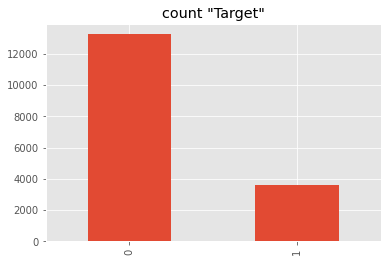

In [ ]:
raw_data['FLAG'].value_counts().plot(kind='bar',title='count "Target"')


(16869, 1034)


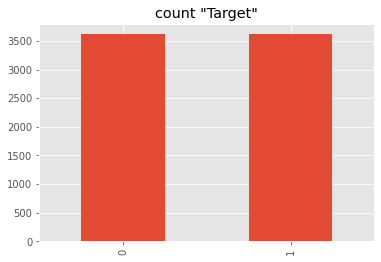

In [ ]:
kWhs = raw_data.iloc[:, 2:]  #seperate the features and the label
labels = raw_data.iloc[:, 1]
print(kWhs.shape)
labels.shape



rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

kWhs,labels=rus.fit_resample(kWhs,labels)
labels.value_counts().plot(kind='bar',title='count "Target"')


In [ ]:
kWhs

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,3.19,0.00,0.00,0.00,0.00,2.42,3.39,7.94,0.00,4.09,...,3.75,2.57,3.28,2.51,1.85,1.87,1.90,2.24,1.96,1.68
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11.06,11.53,10.17,8.35,10.25,10.60,9.67,10.00,11.01,12.81,...,13.55,9.85,12.42,12.63,13.53,12.94,14.03,13.28,11.53,11.14
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.20,3.81,5.76,1.08,5.47,1.33,3.34,1.26,5.02,0.93
4,5.72,6.88,6.65,7.46,6.83,5.87,6.88,6.00,7.19,6.16,...,1.82,2.08,1.45,1.82,2.48,2.37,2.85,2.35,1.79,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7226,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
7227,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,21.69,29.23,32.46,32.56,37.13,32.60,27.74,34.80,34.69,38.82
7228,27.39,80.88,94.42,89.45,75.71,53.74,62.40,85.50,85.27,67.31,...,395.62,356.94,333.40,255.05,249.93,279.94,385.25,335.39,292.34,333.03


In [ ]:
# X_scaled_std_padded=pd.DataFrame(X_scaled_std_padded)
# labels=pd.DataFrame(labels)

# df3_merged1 = pd.concat([X_scaled_std_padded,labels],axis=1,join='inner')

#df3_merged1.to_csv('Balanced_data.csv')

In [ ]:
balance_data=pd.read_csv('/content/drive/MyDrive/China_Dataset/Electricity-theft-detection-master_azmat/Balanced_data.csv')
#balance_data
balance_data=balance_data.drop(['Unnamed: 0'],axis=1)
balance_data
#kWhs,labels=rus.fit_resample(kWhs,labels)
#labels.value_counts().plot(kind='bar',title='count "Target"')

,0,1,2,3,4,5,6,7,8,9,...,1027,1028,1029,1030,1031,1032,1033,1034,1035,FLAG
0,-0.300497,-2.147502,-2.147502,-2.147502,-2.147502,-0.746326,-0.184697,2.449746,-2.147502,0.220602,...,-0.694216,-1.076355,-1.064775,-1.047405,-0.850545,-1.012665,-1.174784,0.0,0.0,0
1,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,...,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,-0.564339,0.0,0.0,0
2,-0.288283,-0.183648,-0.486422,-0.891604,-0.468612,-0.390692,-0.597736,-0.524269,-0.299415,0.101315,...,0.061242,0.261607,0.130257,0.372921,0.205950,-0.183648,-0.270473,0.0,0.0,0
3,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,-1.388752,...,-1.029737,0.429592,-0.946632,-0.278465,-0.969901,0.280002,-1.079600,0.0,0.0,0
4,1.471074,2.007122,1.900837,2.275146,1.984016,1.540391,2.007122,1.600465,2.150376,1.674403,...,-0.331155,-0.026162,-0.076995,0.144818,-0.086237,-0.345018,-0.345018,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,...,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,-0.563271,0.0,0.0,1
7226,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,-0.434879,...,-0.434879,-0.434879,-0.434879,-0.434879,-0.426733,-0.434879,-0.434879,0.0,0.0,1
7227,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,-0.478339,...,4.241114,4.903518,4.246912,3.542472,4.565794,4.549849,5.148478,0.0,0.0,1
7228,-0.945341,-0.386460,-0.244990,-0.296918,-0.440478,-0.670027,-0.579545,-0.338189,-0.340592,-0.528244,...,1.433324,1.379828,1.693382,2.793695,2.272742,1.822942,2.248084,0.0,0.0,1


applying Kmeans-smote to balance data
last modified date: Feb 14 2023

In [ ]:
import pandas as pd
from imblearn.combine import SMOTEENN

# Load the data from the CSV file
kmeans_df = balance_data.copy()

# Separate the features and the target variable
X = kmeans_df.drop('FLAG', axis=1)  # replace 'target_column' with the name of your target column
y = kmeans_df['FLAG']

# Apply KMeans-SMOTE on the X data
kmeans_smote = SMOTEENN()
X_resampled, y_resampled = kmeans_smote.fit_resample(X, y)

# Concatenate the augmented X data with the original X data
balance_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Save the augmented dataset to a new CSV file
# augmented_df.to_csv('your_augmented_file.csv', index=False)


In [ ]:
#kWhs = balance_data.iloc[:, 2:]  #seperate the features and the label
labels = balance_data.FLAG



In [ ]:
balance_data_flag=balance_data.drop(['FLAG'],axis=1)
kWhs = balance_data_flag

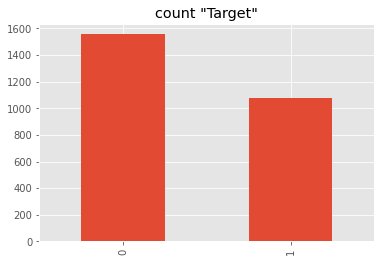

In [ ]:
labels.value_counts().plot(kind='bar',title='count "Target"')

In [ ]:
NUM_CONSUMERS, NUM_DAYS = kWhs.shape

print(NUM_CONSUMERS, NUM_DAYS)

2637 1036


Function to sacle data to try differant type of scaling and plote the data before and fter scaling

In [ ]:

def scale_features(X=kWhs, scaling_strategy='Standard', plot_distributions=False):
  """Allows user to scale features for individual samples using specified scaling strategy.
  `Standard` - all features scaled to have mean 0, standard deviation of 1
  `MinMax` - all features scaled according to x - x_min / (x_max - x_min)
  `MaxAbs` - all features scaled according to x / abs(x_max)
  
  Returns matrix of scaled features as a numpy array.

  Also allows before/after plots of feature values to compare effect of scaling
  """
  # StandardScaler - all features will have mean of 0, and std deviation of 1
  if (scaling_strategy=='Standard'):
    # Instantiate a StandardScaler object
    scaler = StandardScaler()
  elif (scaling_strategy=='MinMax'):
    scaler = MinMaxScaler()
  elif (scaling_strategy=='MaxAbs'):
    scaler = MaxAbsScaler()

  # Make a copy of the features, transpose so that consumers become columns
  X_copy = X.copy().transpose()

  # Once consumers are in columns, scale each consumer using scaler object and retranspose results 
  # Retransposing ensures that in scaled data, the consumers are still rows
  X_scaled = scaler.fit_transform(X_copy).transpose() # THIS IS A NUMPY ARRAY, NOT A DATAFRAME

  # If the user has asked to compare distributions
  if plot_distributions:
    # First figure - before scaling
    plt.figure(figsize=(12, 6))
    distplot(X.values.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Unscaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - Before Scaling', fontsize=18)

    # Second figure - after scaling
    plt.figure(figsize=(12, 6))
    distplot(X_scaled.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Scaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - After {} Scaling'.format(scaling_strategy), fontsize=18)

  # Return the scaled features
  return X_scaled

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


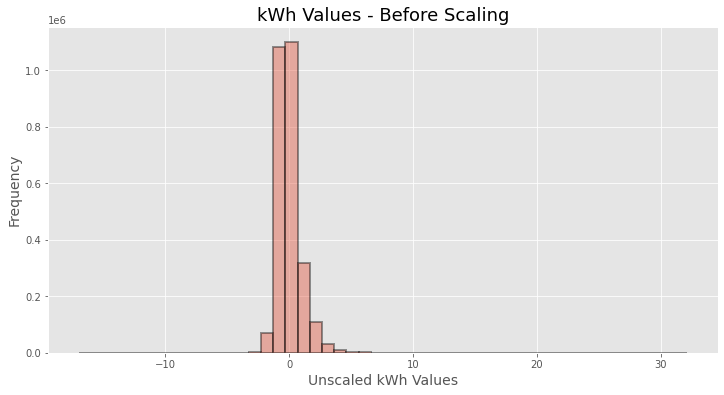

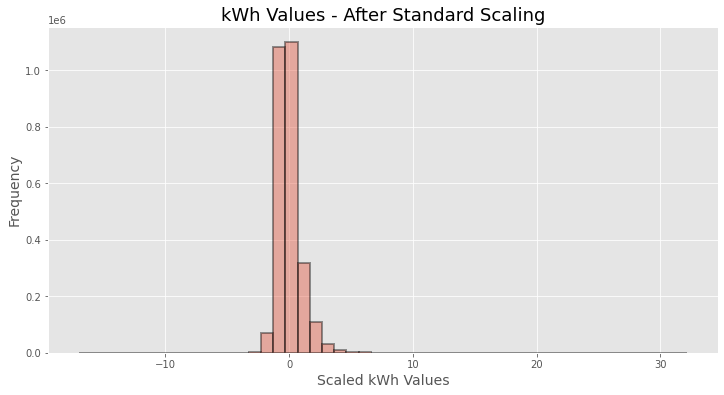

In [ ]:
X_scaled_std = scale_features(X=kWhs,scaling_strategy='Standard', plot_distributions=True)

In [ ]:
# Printing dimension of datatset for padding
NUM_DAYS = 1034
DAYS_PER_WEEK = 7
NUM_WEEKS_FLOAT = NUM_DAYS / DAYS_PER_WEEK 
NUM_WEEKS = int(np.ceil(NUM_WEEKS_FLOAT))
print(f"Number of days per dataset: {NUM_DAYS}.\nNumber of days per week: {DAYS_PER_WEEK}")
print(f"So exact number of weeks: {NUM_WEEKS_FLOAT}\nWhich, when rounded up is {NUM_WEEKS}")
print(f"Which means new number of days is: {NUM_WEEKS * DAYS_PER_WEEK}")
print(f"Extra days to add: {NUM_WEEKS * DAYS_PER_WEEK - NUM_DAYS}")

Number of days per dataset: 1034.
Number of days per week: 7
So exact number of weeks: 147.71428571428572
Which, when rounded up is 148
Which means new number of days is: 1036
Extra days to add: 2


In [ ]:
# 2 extra days per consumer 
X_scaled_std_padded = np.append(X_scaled_std, np.zeros((NUM_CONSUMERS, 0)), 
                                axis=1)


In [ ]:
# Are the last two columns (and only the last two columns) zero

pd.DataFrame(X_scaled_std_padded)

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,-0.300787,-2.149578,-2.149578,-2.149578,-2.149578,-0.747047,-0.184876,2.452114,-2.149578,0.220815,...,-0.248627,-0.694887,-1.077395,-1.065804,-1.048417,-0.851367,-1.013644,-1.175920,2.545040e-15,2.545040e-15
1,-0.288562,-0.183826,-0.486892,-0.892466,-0.469065,-0.391070,-0.598314,-0.524775,-0.299704,0.101413,...,0.014504,0.061301,0.261860,0.130382,0.373281,0.206149,-0.183826,-0.270735,3.941562e-16,3.941562e-16
2,0.223095,0.154895,0.349265,0.091810,0.308345,-0.046295,0.136140,0.763579,0.173650,0.108860,...,0.473729,0.148075,0.182175,0.229915,0.190700,0.182175,0.211160,0.535109,-5.913683e-16,-5.913683e-16
3,0.168317,0.169687,0.111696,0.119002,0.171513,0.199367,0.260097,0.145486,0.097998,0.156445,...,-0.075973,-0.168666,-0.101543,-0.182365,-0.044466,-0.104740,-0.089671,-0.146292,1.523473e-16,1.523473e-16
4,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,-0.665667,...,-0.434462,-0.439313,-0.429612,-0.436079,-0.429612,-0.439313,-0.449014,-0.455481,4.878548e-16,4.878548e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,-0.166912,0.166827,-0.050491,-0.042730,0.115084,0.728232,0.538079,0.146130,0.280660,0.235386,...,0.218569,0.395787,0.138368,0.650619,0.482456,-0.010391,-0.296268,-0.128105,-2.871564e-16,-2.871564e-16
2633,0.558166,0.860612,0.545046,0.681298,0.599883,0.338817,1.533125,0.367750,0.530579,2.455265,...,-0.688287,-0.688624,-0.688287,-0.688624,-0.688624,-0.688960,-0.688960,-0.689296,-1.392982e-15,-1.392982e-15
2634,-0.511395,-0.367225,-0.231637,-0.350062,-0.380956,-0.211042,-0.375807,-0.351779,0.724344,0.992088,...,-0.688174,-0.767124,-0.698472,-0.710486,-0.662430,-0.626387,-0.638401,-0.681309,-3.812304e-16,-3.812304e-16
2635,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,-0.478801,...,4.230705,4.245213,4.908258,4.251017,3.545897,4.570207,4.554248,5.153455,4.033276e-16,4.033276e-16


In [ ]:
# Creating a new numpy array to store the training dat
X_reshaped = np.zeros((NUM_CONSUMERS, NUM_WEEKS, DAYS_PER_WEEK,1))


In [ ]:
def transform_daily_to_weekly(daily_kWhs):
  """Will simply reshape the 1D daily kWhs of a single consumer into 2D weekly data""" 
  return daily_kWhs.reshape(NUM_WEEKS, DAYS_PER_WEEK, 1)

In [ ]:
# Applying this function to every consumer in the original dataset
# And saving the (148, 7) kWhs matrix for that consumer at the ith index in 3D array
for i in range(0, NUM_CONSUMERS):
  X_reshaped[i] = transform_daily_to_weekly(X_scaled_std_padded[i])

In [ ]:
print(X_reshaped.shape)
X_reshaped[0]

(2637, 148, 7, 1)


array([[[-3.00787279e-01],
        [-2.14957754e+00],
        [-2.14957754e+00],
        ...,
        [-2.14957754e+00],
        [-7.47046998e-01],
        [-1.84875663e-01]],

       [[ 2.45211359e+00],
        [-2.14957754e+00],
        [ 2.20814990e-01],
        ...,
        [-2.14957754e+00],
        [-2.14957754e+00],
        [-2.14957754e+00]],

       [[-2.14957754e+00],
        [ 2.23767710e+00],
        [ 2.26665500e+00],
        ...,
        [-2.14957754e+00],
        [-2.14957754e+00],
        [-2.14957754e+00]],

       ...,

       [[-2.13853567e-01],
        [ 5.85936579e-01],
        [ 4.00477994e-01],
        ...,
        [-4.57267960e-01],
        [-5.61588413e-01],
        [-9.84665809e-01]],

       [[-6.07953060e-01],
        [-5.44201671e-01],
        [ 2.37652442e-02],
        ...,
        [-2.48627052e-01],
        [-6.94886771e-01],
        [-1.07739510e+00]],

       [[-1.06580394e+00],
        [-1.04841720e+00],
        [-8.51367452e-01],
        ...,
        

In [ ]:
print(X_reshaped.shape)
labels = np.asarray(labels)

(2637, 148, 7, 1)


In [ ]:
print(labels.shape)

(2637,)


In [ ]:


X_train, X_test, y_train, y_test= train_test_split(X_reshaped,labels,
                                                    test_size=0.2 
                                                    )




In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2109, 148, 7, 1) (528, 148, 7, 1) (2109,) (528,)


**MLP-GRU**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.regularizers import l1_l2

def create_mlp_gru_model(input_shape, num_classes):
    # MLP Input layer
    mlp_input = Input(shape=(input_shape[1],), name='mlp_input')
    # MLP Hidden Layers with Dropout
    x = Dense(128, activation='relu', kernel_regularizer=l1_l2(0.01,0.01))(mlp_input)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01,0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # GRU Input layer
    gru_input = Input(shape=input_shape[1:], name='gru_input')
    # GRU Layers

    gru_input = tf.keras.layers.Reshape((148, 7))(gru_input)

    y = GRU(64, return_sequences=True)(gru_input)
    y = GRU(32)(y)
    # Concatenate MLP and GRU outputs
    combined = Concatenate()([x, y])
    # Output Layer
    output = Dense(1, activation='sigmoid')(combined)
    # Combine the Inputs and Output into a Model
    model = Model(inputs=[mlp_input, gru_input], outputs=output)
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])
    
    
    return model

# Define the Model
model = create_mlp_gru_model(X_train.shape, num_classes=1)

# Train the Model
history = model.fit([X_train[:,:,0], X_train], y_train, epochs=60, batch_size=32, validation_data=([X_test[:,:,0], X_test], y_test))

# Evaluate the Model
predictions = model.predict([X_test[:,:,0], X_test])
predictions = [1 if p>0.5 else 0 for p in predictions]

Epoch 1/60
66/66 [==============================] - 13s 31ms/step - loss: 18.6769 - accuracy: 0.6894 - auc: 0.7288 - val_loss: 13.6736 - val_accuracy: 0.7784 - val_auc: 0.8339
Epoch 2/60
66/66 [==============================] - 1s 17ms/step - loss: 10.2903 - accuracy: 0.7563 - auc: 0.7971 - val_loss: 7.2310 - val_accuracy: 0.7538 - val_auc: 0.8556
Epoch 3/60
66/66 [==============================] - 1s 16ms/step - loss: 5.3402 - accuracy: 0.7833 - auc: 0.8341 - val_loss: 3.8572 - val_accuracy: 0.7386 - val_auc: 0.8697
Epoch 4/60
66/66 [==============================] - 1s 16ms/step - loss: 3.0156 - accuracy: 0.7800 - auc: 0.8469 - val_loss: 2.3691 - val_accuracy: 0.7670 - val_auc: 0.8658
Epoch 5/60
66/66 [==============================] - 1s 22ms/step - loss: 1.9713 - accuracy: 0.8065 - auc: 0.8695 - val_loss: 1.6654 - val_accuracy: 0.8277 - val_auc: 0.8929
Epoch 6/60
66/66 [==============================] - 1s 22ms/step - loss: 1.5190 - accuracy: 0.8070 - auc: 0.8654 - val_loss: 1.4122

In [ ]:
model.save_weights("./MLP-GRU_Weights")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, f1_score

# F-Measure
precision = tf.keras.metrics.Precision()
print(precision)


f1 = f1_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
print("F1-Score:", f1)
print("Matthews Correlation Coefficient:", mcc)

print(classification_report(y_test, predictions))

Precision(name=precision,dtype=float32,thresholds=None,top_k=None,class_id=None)
F1-Score: 0.8348214285714284
Matthews Correlation Coefficient: 0.7147541113926873
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       312
           1       0.81      0.87      0.83       216

    accuracy                           0.86       528
   macro avg       0.85      0.86      0.86       528
weighted avg       0.86      0.86      0.86       528



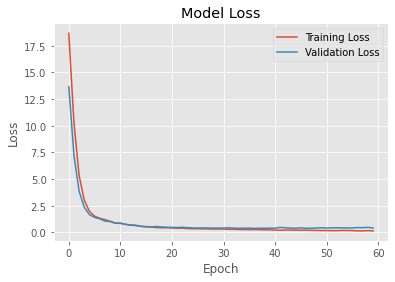

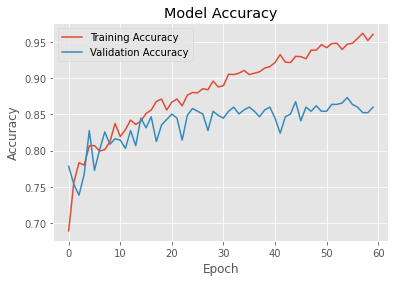

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**EVALUATION OF THE MODEL**



In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'Confusion Matrix  - MLP-GRU')

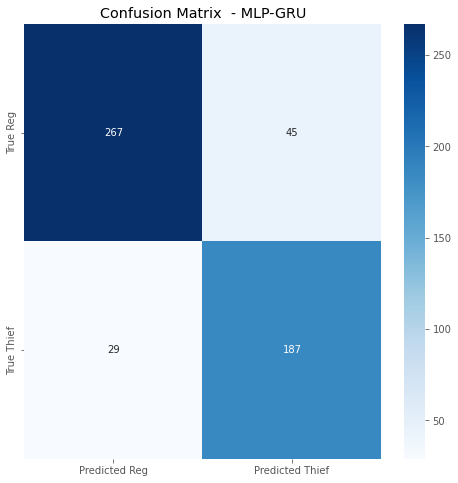

In [ ]:
# Using Seaborn to plot confusion matrix as a heatmap 
conf_mat = confusion_matrix(y_test, predictions)

# Create a heatmap in lieu of the plot_confusion_matrix call in sklearn
plt.figure(figsize=(8, 8))
heatmap(conf_mat, annot=True, fmt='.5g', cmap='Blues', 
      xticklabels=['Predicted Reg', 'Predicted Thief'], 
      yticklabels=['True Reg', 'True Thief'])

model_name = "MLP-GRU"
plt.title('Confusion Matrix ' + ('' if model_name is None else ' - ' + model_name))

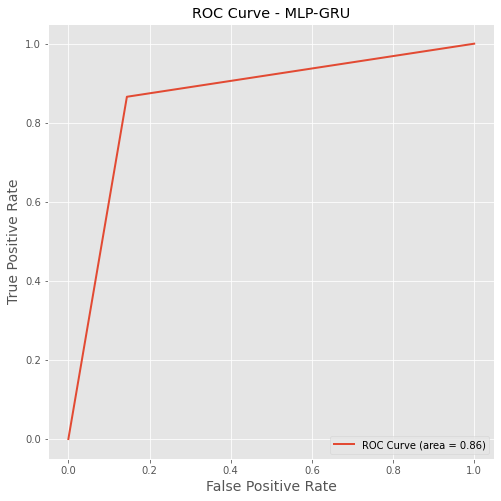

In [ ]:
# ROC Curve
plt.figure(figsize=(8, 8))
fpr, tpr, _ = roc_curve(y_test, predictions, pos_label=1)
roc_auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve' + ('' if model_name is None else (' - ' + model_name)))
plt.legend(loc='lower right')

0.8060344827586207
0.8348214285714284
0.8657407407407407


<BarContainer object of 3 artists>

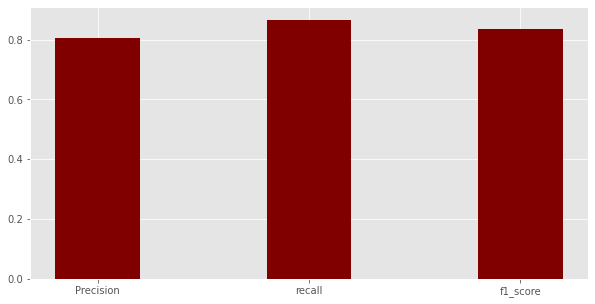

In [ ]:
#bar graph
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
print(precision) 
print(f1)
print(recall)

data = {'Precision':precision, 'recall':recall, 'f1_score':f1}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
      width = 0.4)

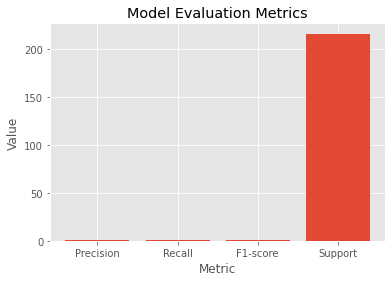

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions)

# Plot the precision, recall, F1-score, and support on a bar chart
labels = ['Precision', 'Recall', 'F1-score', 'Support']
values = [precision[1], recall[1], f1_score[1], support[1]]
plt.bar(labels, values)
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()